<a href="https://colab.research.google.com/github/maliksalman55/Classifications-models/blob/main/Classification.VVG16.model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil

src_path = '/content/drive/MyDrive/Project/kaggle.json'
dest_directory = '/root/.kaggle/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_directory, exist_ok=True)

# Copy the Kaggle JSON file to the destination
shutil.copy(src_path, dest_directory)

'/root/.kaggle/kaggle.json'

In [3]:
#rum this for kaggle link
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
# run this for dataset download
!kaggle datasets download -d markdaniellampa/fish-dataset


 99% 1.57G/1.58G [00:17<00:00, 108MB/s] 
100% 1.58G/1.58G [00:17<00:00, 95.4MB/s]


In [5]:
# unzip download file
import zipfile
zip_ref = zipfile.ZipFile ('/content/fish-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
# confirm dataset
!kaggle datasets download /content/kaggle.json

Invalid dataset specification /content/kaggle.json


In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/train', # I pass and use train dataset path.
    labels="inferred", # because we hv labels dataset.
    label_mode="categorical",   # we use categorical became we hv more then 2 classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None, # if we need to rotate image then put seed value.
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8809 files belonging to 31 classes.


In [9]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2751 files belonging to 31 classes.


In [10]:
#loading the pretrained vgg16 model
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(224, 224, 3))  # Input size matches image_size

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
#  Building Model
model = tf.keras.Sequential()
#cnn = tf.keras.models.Sequential()

In [12]:
#Building Convolution Layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:

model.add(tf.keras.layers.Dropout(0.25)) # This dropout helps model to over fitting

In [14]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten()) #
model.add(tf.keras.layers.Dense(units=512,activation='relu')) # add nuronss 128.
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [16]:
#Output Layer
model.add(tf.keras.layers.Dense(units=31,activation='softmax')) # we use sotmax because we hv categorical data

In [17]:
#Compiling and Training Phase
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [19]:
 training_history = model.fit(x=training_set,validation_data=validation_set,epochs=32) # also save traning history


Epoch 1/32
276/276 [==============================] - 50s 153ms/step - loss: 4.9004 - accuracy: 0.1334 - val_loss: 3.1227 - val_accuracy: 0.1512
Epoch 2/32
276/276 [==============================] - 42s 147ms/step - loss: 3.1315 - accuracy: 0.1631 - val_loss: 2.9266 - val_accuracy: 0.1912
Epoch 3/32
276/276 [==============================] - 44s 153ms/step - loss: 2.8805 - accuracy: 0.2123 - val_loss: 2.5025 - val_accuracy: 0.2984
Epoch 4/32
276/276 [==============================] - 41s 145ms/step - loss: 2.6322 - accuracy: 0.2738 - val_loss: 2.2931 - val_accuracy: 0.3922
Epoch 5/32
276/276 [==============================] - 42s 147ms/step - loss: 2.3973 - accuracy: 0.3344 - val_loss: 2.0752 - val_accuracy: 0.4366
Epoch 6/32
276/276 [==============================] - 42s 144ms/step - loss: 2.1527 - accuracy: 0.3971 - val_loss: 1.7310 - val_accuracy: 0.5227
Epoch 7/32
276/276 [==============================] - 41s 146ms/step - loss: 1.9178 - accuracy: 0.4591 - val_loss: 1.4544 - val_ac

In [20]:
# Evaluating Model
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

276/276 [==============================] - 31s 108ms/step - loss: 0.0356 - accuracy: 0.9921
Training accuracy: 0.9920535683631897


In [21]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

86/86 [==============================] - 8s 86ms/step - loss: 0.4139 - accuracy: 0.9444
Validation accuracy: 0.9443838596343994


In [ ]:
model.save('/content/drive/MyDrive/Project/Models/Vgg16_model.keras') # i save model (h5) is file extension

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved model
saved_model_path = '/content/drive/MyDrive/Project/Models/Vgg16_model.keras'  # Specify the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and collect true and predicted labels
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Extract true labels
    predictions = loaded_model.predict(images)  # Predict labels
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# You can also print a classification report for additional metrics
report = classification_report(true_labels, predicted_labels, labels=range(31), target_names=validation_set.class_names)
print("Classification Report:")
print(report)



1/1 [==============================] - 0s 89ms/step
Confusion Matrix:
[[ 49   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0  56   0   1   0   1   0   1   1   0   0   1   0   0   0   0   0   0
    1   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0  60   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0  93   0   0   0   0   1   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   1   1   0   0]
 [  0   1   0   0  43   0   1   0   0   0   0   1   0   0   0   0   1   0
    0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0  57   0   0   0   0   0   0   0   0   1   0   1   0
    0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   1   1   0   0  80   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   1   0   0   0   0  

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

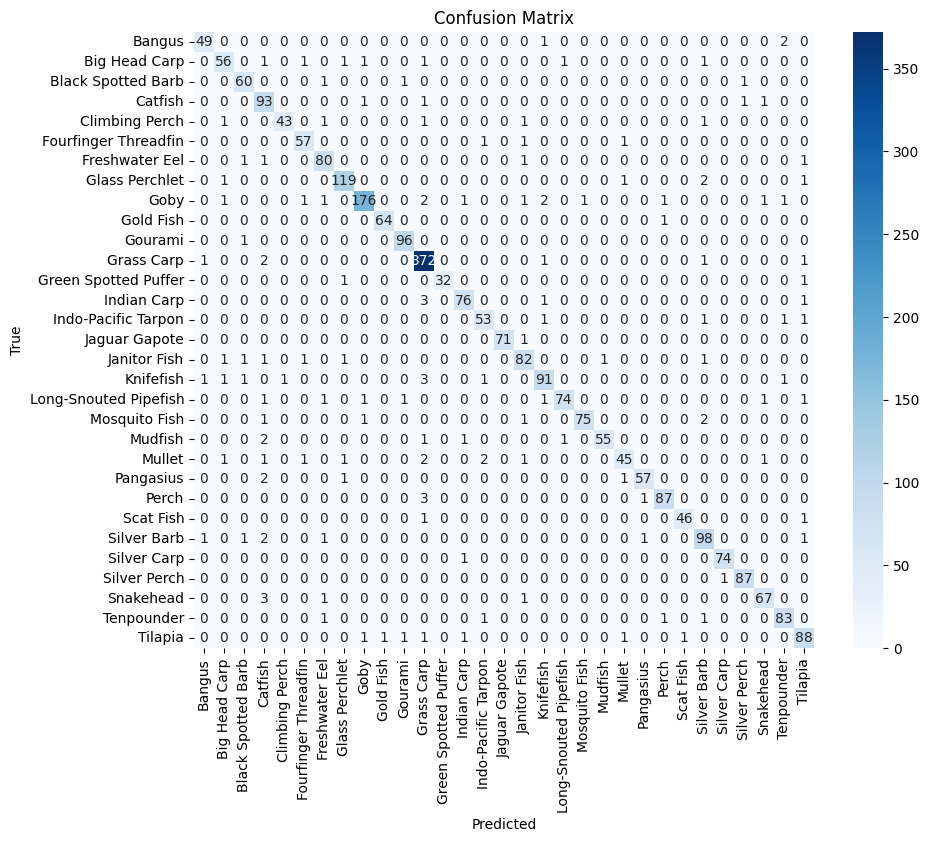

In [24]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=validation_set.class_names, yticklabels=validation_set.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [25]:
training_history.history #Return Dictionary of history

{'loss': [4.900401592254639,
  3.1315081119537354,
  2.880462646484375,
  2.6321873664855957,
  2.3972620964050293,
  2.1526644229888916,
  1.9177576303482056,
  1.6632304191589355,
  1.4838905334472656,
  1.2990206480026245,
  1.1132569313049316,
  0.9140676259994507,
  0.8153382539749146,
  0.7442201375961304,
  0.6086056232452393,
  0.5541484355926514,
  0.5154493451118469,
  0.4707581102848053,
  0.42392653226852417,
  0.3834840953350067,
  0.36801329255104065,
  0.32830241322517395,
  0.2867617607116699,
  0.31088411808013916,
  0.32570576667785645,
  0.2957534193992615,
  0.26381105184555054,
  0.27982643246650696,
  0.2341853529214859,
  0.2242501825094223,
  0.21127553284168243,
  0.18818852305412292],
 'accuracy': [0.13338631391525269,
  0.16312861442565918,
  0.21228289604187012,
  0.27381086349487305,
  0.3344306945800781,
  0.39709389209747314,
  0.4590759575366974,
  0.5240095257759094,
  0.5766829252243042,
  0.6301509737968445,
  0.6782835721969604,
  0.7310705184936523,

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
#Calculating Accuracy of Model Achieved on Validation set
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100)) # (-1) show use final Accuracy

Validation set Accuracy: 94.43838596343994 %


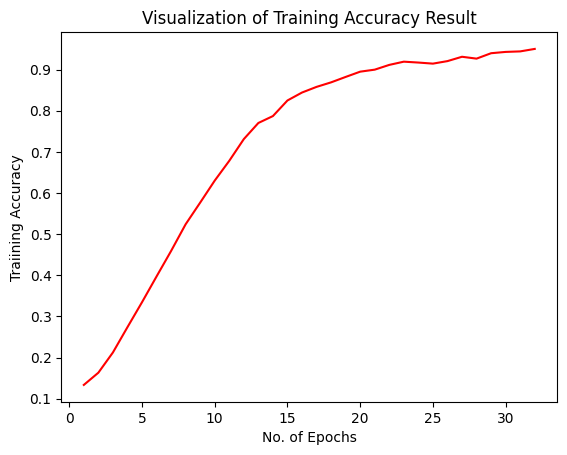

In [29]:
#Accuracy Visualization Training Visualization
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

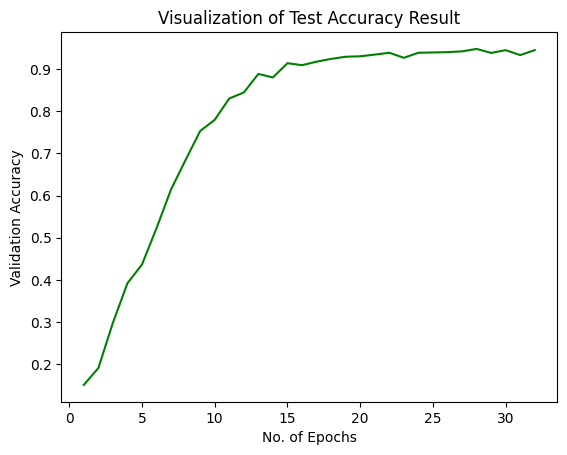

In [31]:
#Test Accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='Green')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Test Accuracy Result')
plt.show()

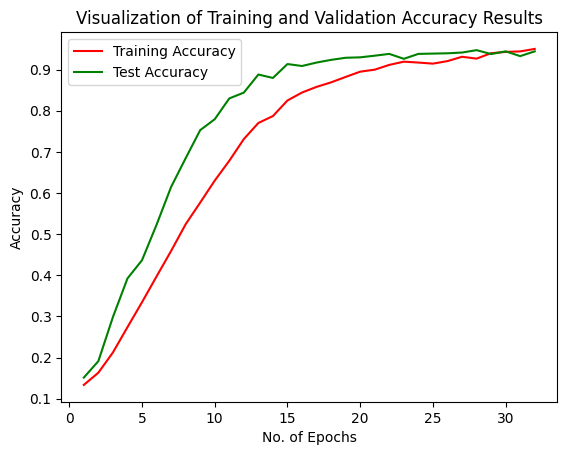

In [32]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 33)]

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='Green', label='Test Accuracy')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Training and Validation Accuracy Results')
plt.legend()
plt.show()